In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
import os.path
import datetime 

In [2]:
from surveysim.wrapper import surveySim

In [3]:
def collect_tile_id(start, end):
    day_now = start
    id_list = np.empty((0), dtype=int)
    id_plan = np.empty((0), dtype=int)
    while(day_now <= end):
        day_now = day_now + datetime.timedelta(days=1)
        listdirName = "{}{}{:02d}{:02d}{}".format('obslist',day_now.year, day_now.month, day_now.day, '.fits')   
        plandirName = "{}{}{:02d}{:02d}{}".format('obsplan',day_now.year, day_now.month, day_now.day, '.fits')    

        #print(day_now,listdirName)
        if os.path.exists(listdirName):
            a = Table.read(listdirName)
            set_a = set(a['TILEID'])
            set_id = set(id_list)
            set_diff = set_a - set_id
            id_list = np.append(id_list, np.array(list(set_diff), dtype=int)) #only add the IDs that don't repeat
        
        if os.path.exists(plandirName):
            a = Table.read(plandirName)
            set_a = set(a['TILEID'])
            set_id = set(id_plan)
            set_diff = set_a - set_id
            id_plan = np.append(id_plan, np.array(list(set_diff), dtype=int)) #only add the IDs that don't repeat
    
    return {'OBSERVED':id_list, 'PLANNED':id_plan}

In [4]:
! rm -f *.fits
start_string = "01-01-2019"
start = datetime.datetime.strptime(start_string, "%d-%m-%Y")

n_epochs = 8
days_per_epoch = 4

fiberassign_cadence = datetime.timedelta(days=days_per_epoch)
cadence_unit = datetime.timedelta(days=1)


end = start + fiberassign_cadence - cadence_unit

for i in range(n_epochs):
    print('\n\n')
    surveySim((start.year, start.month, start.day), (end.year, end.month, end.day))
    dd = collect_tile_id(start, end)
    print dd['OBSERVED'], len(dd['OBSERVED']), len(dd['PLANNED'])
    print ('These were the observed tiles: {}'.format(dd['OBSERVED']))
    np.savetxt('observed_epoch{}.txt'.format(i), dd['OBSERVED'], fmt='%d')
    np.savetxt('epoch{}.txt'.format(i), dd['PLANNED'], fmt='%d')
    start = start + fiberassign_cadence 
    end = start + fiberassign_cadence - cadence_unit




2019-01-01 19:00:00


The survey will start from scratch.

Conditions at the beginning of the night: 
('\tSeeing: ', 0.57485555002338, 'arcseconds')
('\tTransparency: ', 1.0)
('\tCloud cover: ', 14.380861828745987, '%')
('On the night starting ', '2019-01-01 19:00:00.000', ', we observed ', 34, ' tiles.')

Bad weather forced the dome to remain shut for the night.
('On the night starting ', '2019-01-02 19:00:00.000', ', we observed ', 0, ' tiles.')

Conditions at the beginning of the night: 
('\tSeeing: ', 0.8360375991290069, 'arcseconds')
('\tTransparency: ', 0.9445651797307093)
('\tCloud cover: ', 15.125685450762655, '%')
('On the night starting ', '2019-01-03 19:00:00.000', ', we observed ', 34, ' tiles.')

Bad weather forced the dome to remain shut for the night.
('On the night starting ', '2019-01-04 19:00:00.000', ', we observed ', 0, ' tiles.')
[26369 23174 23307 23310 23311   149 25113 25114 25120 26160  2725  2726
  2732  2736  2099  2740 23608 23609 23612 23947 26822 26823 23884  2739
 26840 26842

In [5]:
full_tile_data = Table.read('/home/forero/desihub/surveysim/py/surveysim/data/desi-tiles.fits')
full_tile_data[3]

TILEID,RA,DEC,PASS,IN_DESI,EBV_MED,AIRMASS,EXPOSEFAC,STAR_DENSITY,PROGRAM,OBSCONDITIONS,I_INCREASE,G_INCREASE,HA,OBSTIME,OVERHEAD,BEGINOBS,ENDOBS,GALACLAT,GALACLON
,deg,deg,,,,,,1 / deg2,,,,,,,,,,,
int32,float32,float32,int16,int16,float32,float32,float32,float32,str4,uint16,float32,float32,float32,float32,float32,float32,float32,float64,float64
7,332.35,12.32,0,1,0.0744952,1.07357,1.0,3596.16,DARK,1,1.26239,1.57343,-9.10874,2000.95,180.0,21.2465,21.8523,-33.6823751944,72.7243045556


In [6]:
#for i in range(n_epochs):
#    id_plan = np.loadtxt("epoch{}.txt".format(i), dtype='int')
#    id_list = np.loadtxt("observed_epoch{}.txt".format(i), dtype='int')
#    print("epoch {}".format(i))
#    print("planned {}".format(len(id_plan), id_plan))
#    print("done {} {}\n\n".format(len(id_list), id_list))

done_tiles = Table.read("obslist_all.fits")
print done_tiles
len(set(done_tiles['TILEID'])), set(done_tiles['STATUS']), 

TILEID       RA           DEC       ...         DATE-OBS             MJD     
------ ------------- -------------- ... ----------------------- -------------
 25393 356.230010986            0.0 ... 2019-01-03T00:55:49.181 58486.0387637
 23644 5.69000005722 -7.98999977112 ... 2019-01-03T01:22:15.617 58486.0571252
 23189 4.32000017166            0.0 ... 2019-01-03T01:44:43.538 58486.0727261
 23610 11.0699996948 -2.68000006676 ... 2019-01-03T02:08:31.667 58486.0892554
 23589 15.0900001526            0.0 ... 2019-01-03T02:31:36.026 58486.1052781
 23591 20.4200000763            0.0 ... 2019-01-03T02:55:28.496 58486.1218576
 23306 31.1000003815 -14.8400001526 ... 2019-01-03T03:23:42.443 58486.1414635
 23309 33.6500015259 -7.30999994278 ... 2019-01-03T03:48:49.302  58486.158904
 23146 36.0400009155            0.0 ... 2019-01-03T04:12:50.431 58486.1755837
 23308 44.4199981689 -6.05000019073 ... 2019-01-03T04:40:23.879 58486.1947208
   ...           ...            ... ...                     ... 

(566, {2})

In [7]:
print done_tiles.keys()

['TILEID', 'RA', 'DEC', 'PROGRAM', 'EBMV', 'MAXLEN', 'MOONFRAC', 'MOONDIST', 'MOONALT', 'SEEING', 'LINTRANS', 'AIRMASS', 'DESSN2', 'STATUS', 'EXPTIME', 'OBSSN2', 'DATE-OBS', 'MJD']


DARK 321
GRAY 245
BRIGHT 0


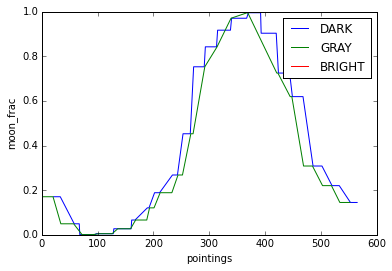

In [9]:
pointings = np.arange(len(done_tiles))
progs = ['DARK', 'GRAY', 'BRIGHT']
for p in progs:
    ii = (np.array(done_tiles['PROGRAM']) ==p)
    print p, np.count_nonzero(ii)
    plt.plot(pointings[ii],done_tiles['MOONFRAC'][ii], label=p)
plt.legend()
plt.xlabel('pointings')
plt.ylabel('moon_frac')

DARK 321
GRAY 245
BRIGHT 0


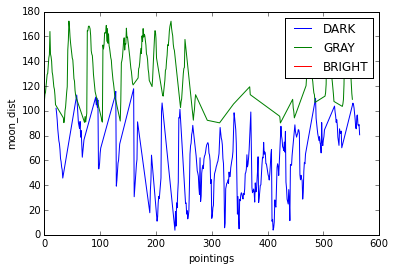

In [11]:
progs = ['DARK', 'GRAY', 'BRIGHT']
for p in progs:
    ii = (np.array(done_tiles['PROGRAM']) ==p)
    print p, np.count_nonzero(ii)
    plt.plot(pointings[ii],done_tiles['MOONDIST'][ii], label=p)
plt.legend()
plt.xlabel('pointings')
plt.ylabel('moon_dist')

DARK 321
GRAY 245
BRIGHT 0


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


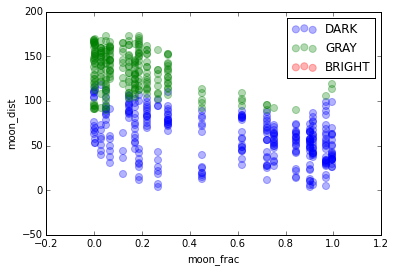

In [13]:
progs = ['DARK', 'GRAY', 'BRIGHT']
color = ['blue', 'green', 'red']
for p,c in zip(progs, color):
    ii = (np.array(done_tiles['PROGRAM']) ==p)
    plt.scatter(done_tiles['MOONFRAC'][ii],done_tiles['MOONDIST'][ii], label=p, color=c,s=50,alpha=0.3)
    print p, np.count_nonzero(ii)
plt.legend()
plt.xlabel('moon_frac')
plt.ylabel('moon_dist')